In [1]:
%%time
import gzip
from tensorflow.keras.utils import to_categorical

Wall time: 4.45 s


In [2]:
%%time
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

Wall time: 223 ms


In [3]:
%%time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import  Aer, transpile, IBMQ, assemble
from qiskit.circuit.library import CHGate
from qiskit.quantum_info.operators import Operator
from qiskit.aqua.operators import PrimitiveOp, CircuitStateFn
from qiskit.aqua.operators.primitive_ops import MatrixOp
from qiskit.aqua.operators.converters import CircuitSampler
from qiskit.aqua.operators.expectations import ExpectationFactory
from qiskit.aqua.operators.list_ops import ComposedOp
from qiskit.aqua.operators import ListOp
from qiskit.aqua.operators import Zero

Wall time: 2.78 s


In [20]:
%%time
provider = IBMQ.load_account()

Wall time: 2.18 s


In [4]:
%%time
# print(Aer.backends())
simulator = Aer.get_backend("statevector_simulator")
# simulator.set_option(method=)
my_sampler = CircuitSampler(backend=simulator, attach_results=True, param_qobj=False)  # read up on this more
my_expectation = ExpectationFactory()

Wall time: 5 ms


In [5]:
%%time
# EMNIST decoder

decoder = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

Wall time: 0 ns


In [6]:
%%time
images_raw = gzip.open("data/MNIST/MNIST_GZ/train-images-idx3-ubyte.gz", "r")
labels_raw = gzip.open("data/MNIST/MNIST_GZ/train-labels-idx1-ubyte.gz")


image_size = 28
num_images = 512 # how many images per batch

images_raw.read(16) # reads the data type
labels_raw.read(8) # reads the data type

def get_data(images, labels):
    buf_images = images.read(image_size * image_size * num_images)
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(num_images, image_size, image_size, 1)
    
    buf_labels = labels.read(num_images)
    labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int32)
    
    return images, labels

Wall time: 2.96 ms


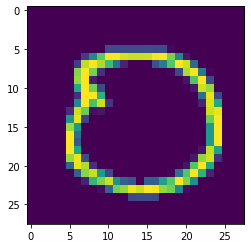

0
Wall time: 146 ms


In [7]:
%%time
# print images
data = get_data(images_raw, labels_raw)

images = data[0]
labels = data[1]



sort_index = np.argsort(data[1], axis=0)

sorted_images = data[0][sort_index]
sorted_labels = data[1][sort_index]

sorted_data = sorted_images, sorted_labels

image = np.asarray(sorted_images[1]).T.squeeze()
plt.imshow(image)
plt.show()

print(decoder[sorted_labels[1]])

In [8]:
%%time
print(sorted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 

In [9]:
%%time
def get_num_cls(data):
    labels = np.array(data[1])
    one_hot_labels = to_categorical(labels)
    
    return one_hot_labels.shape[1]


Wall time: 0 ns


In [10]:
%%time
N = get_num_cls(data)
print(N)

10
Wall time: 1.02 ms


In [146]:
class AdamOptim():
    """From https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc"""
    def __init__(self, num_of_keys=1, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw = {key: 0 for key in range(num_of_keys)}
        self.v_dw = {key: 0 for key in range(num_of_keys)}
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, key, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw[key] = self.beta1*self.m_dw[key] + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw[key] = self.beta2*self.v_dw[key] + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw[key]/(1-self.beta1**t + self.epsilon)
        m_db_corr = self.m_db/(1-self.beta1**t + self.epsilon)
        v_dw_corr = self.v_dw[key]/(1-self.beta2**t + self.epsilon)
        v_db_corr = self.v_db/(1-self.beta2**t + self.epsilon)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [159]:
# %%time

class Forward_and_backward:
    """see:
        https://arxiv.org/pdf/1908.08385.pdf
        equations 1 and 2
        also see:
        https://qiskit.org/documentation/stubs/qiskit.circuit.library.CHGate.html
    """
    def __init__(self, N, data, num_of_it):
        """"""
        self.num_of_it = num_of_it
        self.N = 1
        self.target_N = N
        self.SU_of_N = np.asarray([[1]])
        self.data = data
        self.alpha = np.arange(start=1, stop= self.target_N ** 2 + 1, dtype=np.complex_) # kind of like biases
        self.K = 1
        self.P = self.K * np.exp(1j * np.asarray([[0, -1j], [1j, 0]])) * self.K


    
    def H(self):
        """"""
        h = []
        
        for i in range(self.target_N):
            h.append([0])

        #print(h)
        
        for i in range(self.target_N):
            for k in range(self.target_N):
                term0 = np.exp(((1j * 2 * np.pi * i * k)  / self.target_N)) #KET K GOES HERE?
                try:
                    term1 = term1 + term0
                except:
                    term1 = term0

            h[i] = term1
        h = np.asarray(h, dtype=object)
        H_op = 1 / np.sqrt(self.target_N) * h

        return H_op
        
    def quNit(self):
        S3 = np.zeros(shape=(self.target_N, self.target_N))
        np.fill_diagonal(S3, val=-(self.target_N - 1) / 2)
        # print(self.x.shape)
        # print(self.W[self.i].shape)
        sum_of_weights = np.sum(np.vdot(self.W[self.i], self.x), ) # all x's of type i
        # print(sum_of_weights)
        Z = np.exp(1j * S3 * sum_of_weights)
        
        # Z_op = PrimitiveOp(Z)
        
        return Z * self.H() * Zero
 ##################################################   
    
    def driver_for_SUG(self):
        """finds the value for alpha which is a self.target_N set"""
        
        
        # print(self.SU_of_N.shape[0] * self.SU_of_N.shape[1])
        # print(self.alpha.shape)
        
        return self.SU_of_N / self.alpha.reshape(self.target_N, self.target_N)
    
    
    def direct_sum(self, a, b):
        """"""
        if isinstance(a, int) and a == 1:
            a = np.asarray([a])[np.newaxis]

        # print("a = ", a)
        # print("b = ", b)
        # dsum = np.zeros( np.add(a.shape,b.shape), dtype=np.complex_ )
        # dsum[:a.shape[0],:a.shape[1]]=a
        # dsum[a.shape[0]:,a.shape[1]:]=b
        dsum = a + b
        # print(dsum)
        return dsum

    def A(self, k, lie_alge, a):
        term0 = 1j * lie_alge * 3 * a * (2 * k - 3)
        term1 = np.exp(term0)
        term2 = 1j * lie_alge
        term3 = np.exp(term2)
        term4 = ((k-1) ** 2 + 1) * a * (2 * (k - 1))
        term5 = term3 * term4
        term6 = term1 * term5
        
        return term6

    def lie_algebra(self):
        
        if self.N == 1:
            return 1
        
        lie_alg = self.direct_sum(self.K,  self.P)
        
        # print("lie", lie_alg.shape)
        
        return lie_alg
    
    def mat(self):
        if self.N > 1:
            n = self.N
            mat = np.zeros(shape=(n, n), dtype=np.complex_)
            mat[0, n - 1] = -1j
            mat[n - 1, 0] = 1j
            
        else:
            mat = np.asarray([[1]], dtype=np.complex_)
        # print("mat", mat.shape)
        # print(mat)
        
        return mat
        
    
    def Euler_angle_param(self):
        """"""
        print("SU(N), N = ", self.N - 1)
        if self.N == self.target_N + 1:
            print("SU of N FOR {} FOUND".format(self.N - 1))
            return self.SU_of_N  
        

        if self.N < 2:
            A = 1
        else:
            A = np.array([0])
            lie_alge = self.lie_algebra()
            for k in range(self.target_N):
                #print(k)
                for a in self.alpha:
                    #print(a)
                    try:
                        B = self.A(k, lie_alge, a)
                        A = np.vdot(A, B)
                    except:
                        A = self.A(k, lie_alge, a)
                    
                    
        self.N += 1
        lie_algebra = self.lie_algebra()
        self.P = self.K * np.exp(1j * self.mat()) * self.K

        self.SU_of_N = self.K * lie_algebra * A
        self.K = self.Euler_angle_param()
        return self.SU_of_N
    ############################################
    
    
    def forward(self):
        """"""
        qr = QuantumRegister(1, 'a')
        cr = ClassicalRegister(1, 'creg')
        # init values for forward
        ket_x = self.quNit()
        SU_N = self.driver_for_SUG()
        
        # weighted ket_x
        ket_x = SU_N * ket_x

        ket_x_list = []
        ket_x = ListOp([ListOp([x for x in op]) for op in ket_x])
        for op in ket_x:
            row = []
            for x in op:
                coeff = x.coeff
                x = x.to_circuit_op().to_circuit()
                x.add_register(qr)
                x.add_register(cr)
                x.measure(qr[0], cr[0])
                # print("x = ", x)
                job = execute(x, simulator)
                result = job.result()
                outputstate = result.get_statevector(x, decimals=10)
                row.append(outputstate.tolist()[0] * coeff)
                # print("output = ", outputstate)
            ket_x_list.append(row)
            # print("row = ", row)
        
        ket_x = np.asarray(ket_x_list)
        
        def Purity(N, ket_x):
            """"""
            bra_x = np.asmatrix(ket_x).H
            
            return ((ket_x @ bra_x) / N) ** 2
            
        Pa = Purity(self.target_N, ket_x)
        # print(Pa)
        Pb = np.argmax(np.diag(Pa.real))
        print("prediction = ", Pb)

        return Pb, ket_x

    def backward(self, pred_dict, i):
        """"""
        qr = QuantumRegister(1, 'b')
        cr = ClassicalRegister(1, 'creg_b')
        SU_N = np.asmatrix(self.driver_for_SUG())
        qc = self.quNit()
        Mk = self.target_N * self.target_N
        
        Pk = np.asarray(np.asmatrix(pred_dict[decoder[i]][1]) * np.asmatrix(pred_dict[decoder[i]][1]).H)  / Mk

        Pk = np.asarray(SU_N @ Pk @ SU_N.H)

        Pk = Pk * qc
        
        Pk_list = []
        Pk = ListOp([ListOp([x for x in op]) for op in Pk])
        for op in Pk:
            row = []
            for x in op:
                coeff = x.coeff
                x = x.to_circuit_op().to_circuit()
                x.add_register(qr)
                x.add_register(cr)
                x.measure(qr[0], cr[0])
                # print("x = ", x)
                job = execute(x, simulator)
                result = job.result()
                outputstate = result.get_statevector(x, decimals=10)
                row.append(outputstate.tolist()[0] * coeff)
                # print("output = ", outputstate)
            Pk_list.append(row)
            # print("row = ", row)
        
        Pk = np.asarray(Pk_list)
        
        Ek = 1 - Pk
        # print(Ek)
        return Ek
    
    
    #ERRROR PROBABLY HERE!!!
    def grad_function(self, E):
        """"""
        return E / self.target_N
        """M = self.target_N * self.target_N
        
        return 1 / M * 1 / 2 * self.target_N * (self.target_N + 1)"""
        
    def train(self):
        print("initializing SU(N)") # try except here for init of su(n)
        # self.Euler_angle_param()
        
        Mk = self.target_N * self.target_N
        pred_dict = {}
        total_error = 0
        init_W = True
        self.W = {}
        adam = AdamOptim(num_of_keys=self.target_N)
        
        
        for j in range(self.num_of_it):
            for i in range(self.target_N):
                self.i = i
                print("working on {}s".format(decoder[i]))
                sorted_images = self.data[0]
                sorted_labels = self.data[1]
                # print(sorted_labels.shape)
                y = sorted_labels[sorted_labels == i]
                # print(y)
                self.x = sorted_images[sorted_labels == i]
                
                try:
                    # print(self.x.shape)
                    self.x = self.x.squeeze(axis=(0, -1))
                    # print(self.x.shape)
                except(ValueError):
                    # print(self.x.shape)
                    self.x = self.x.squeeze(axis=-1)
                    # print(self.x.shape)
                    
                """image = self.x[0]
                plt.imshow(image)
                plt.show()"""

                if init_W:
                    self.W[self.i] = np.random.uniform(high=1, low=0, size=self.x.shape) # learnable similar to weights

                pred_dict[decoder[i]] = self.forward()
                Ek = self.backward(pred_dict, i)

                total_error += Mk * Ek
                dw = self.grad_function(self.W[self.i])
                db = self.grad_function(self.alpha)
                self.W[self.i], self.alpha = adam.update(key=i, t=j, w=self.W[self.i], b=self.alpha, dw=dw, db=db)
            total_error /= self.target_N
            init_W = False
            print(np.max(total_error.real))
                
                
                
                
                
            

In [160]:
# %time
train = Forward_and_backward(N, sorted_data, 10)

In [161]:
%%time
train.Euler_angle_param()

SU(N), N =  0
SU(N), N =  1
SU(N), N =  2
SU(N), N =  3
SU(N), N =  4
SU(N), N =  5
SU(N), N =  6
SU(N), N =  7
SU(N), N =  8
SU(N), N =  9
SU(N), N =  10
SU of N FOR 10 FOUND
Wall time: 188 ms


array([[-9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -1.76400824e+12+3.42106296e+12j],
       [-9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j],
       [-9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+

In [162]:
# %%time
train.train()

initializing SU(N)
working on 0s
prediction =  0
working on 1s
prediction =  0
working on 2s
prediction =  0
working on 3s
prediction =  0
working on 4s
prediction =  0
working on 5s
prediction =  0
working on 6s
prediction =  0
working on 7s
prediction =  0
working on 8s
prediction =  0
working on 9s
prediction =  0
-1.4339809086493387e+46
working on 0s
prediction =  0
working on 1s
prediction =  0
working on 2s
prediction =  0
working on 3s
prediction =  0
working on 4s
prediction =  0
working on 5s
prediction =  0
working on 6s
prediction =  0
working on 7s
prediction =  0
working on 8s
prediction =  0
working on 9s
prediction =  0
-1.4339809088260408e+45
working on 0s
prediction =  0
working on 1s
prediction =  0
working on 2s
prediction =  0
working on 3s
prediction =  0
working on 4s
prediction =  0
working on 5s
prediction =  0
working on 6s
prediction =  0
working on 7s
prediction =  0
working on 8s
prediction =  0
working on 9s
prediction =  0
-1.4339809095887889e+44
working o